In [8]:
import pandas as pd

keyword = pd.read_csv('./dataset/금지어keyword.csv')
products = pd.read_csv('./dataset/product_concat_v3.csv')

print('금지어:', keyword.shape)
print('상품데이터:', products.shape)

금지어: (923, 1)
상품데이터: (751315, 11)


In [15]:
products['CATALOG_NM']

0         1-BOC-4-(4-BROMO-PHENYLAMINO)-PIPERIDINECas 44...
1         High Purity N- (Tert-Butoxycarbonyl) -4-Piperi...
2                   1,1-dimethylethyl Ester CAS 288573-56-8
3         White Crystal N-Isopropylbenzylamine CAS 102-9...
4                                     Soybean GMO & NON-GMO
                                ...                        
751310     Cosmetic Ingredient Peptides Lipotec Serilesine 
751311    60HRC  2 Flutes Solide Carbide Twist Drilling ...
751312    45 HRC Solide Carbide 3 Flutes Fat Square Stan...
751313    Factory Manufacture 55 HRC Solide Carbide 4 Fl...
751314    55 HRC Solide Carbide 4 Flutes Fat Square Stan...
Name: CATALOG_NM, Length: 751315, dtype: object

In [17]:
products['CATALOG_NM'].apply(remove_punctuation)

0         1 B O C 4 4 B R O M O P H E N Y L A M I N O P ...
1         H i g h   P u r i t y   N   T e r t B u t o x ...
2         1 1 d i m e t h y l e t h y l   E s t e r   C ...
3         W h i t e   C r y s t a l   N I s o p r o p y ...
4                     S o y b e a n   G M O     N O N G M O
                                ...                        
751310    C o s m e t i c   I n g r e d i e n t   P e p ...
751311    6 0 H R C     2   F l u t e s   S o l i d e   ...
751312    4 5   H R C   S o l i d e   C a r b i d e   3 ...
751313    F a c t o r y   M a n u f a c t u r e   5 5   ...
751314    5 5   H R C   S o l i d e   C a r b i d e   4 ...
Name: CATALOG_NM, Length: 751315, dtype: object

#  설명 안에 불필요한 개행 기호 제거, 특수기호

In [16]:
import string

# 'CATALOG_DESC' 열에는 문자열과 숫자(float) 값이 혼합되어 있다고 가정
def remove_punctuation (text):
    if isinstance(text, str):
        return ' '.join(char for char in text if char not in string.punctuation)
    else:
        return str(text)

# 함수를 'CATALOG_DESC' 열에 적용
# products['CATALOG_DESC'] = products['CATALOG_DESC'].apply(remove_punctuation)

In [3]:
print(keyword)

           KEYWORD
0            Xanax
1             Yaba
2        Yohimbine
3    Yucantan Fire
4    ZUMBA Fitness
..             ...
918   Norephedrine
919     North Face
920        Norvasc
921         Nubain
922       Nutropin

[923 rows x 1 columns]


In [4]:
products['CATALOG_DESC'] = products['CATALOG_DESC'].str.lower()
keywords = keyword['KEYWORD'].str.lower()

In [5]:
def keywords_in_products(col):
    matched_keywords = [word for word in keywords if word in col]
    return matched_keywords if matched_keywords else None

# 상품설명 안에 키워드 데이터 프레임

In [6]:
keyword_in_desc_df = pd.DataFrame({'CATALOG_DESC':products['CATALOG_DESC'],
                           'KEYWORD':products['CATALOG_DESC'].apply(keywords_in_products),
                           'judge': products['judge']})

In [33]:
keyword_in_desc_df.head()

,CATALOG_DESC,KEYWORD,judge
0,1 名称和标识符11 名称1叔丁氧羰基4（4溴苯基氨基）哌啶12 同义词1哌啶羧酸4（4溴苯...,None,0
1,1 名称和标识符11 名称n叔丁氧羰基4哌啶酮12 同义词1叔丁氧羰基4哌啶酮1叔丁氧羰基4...,None,0
2,1 names and identifiers11 name1boc44fluorophen...,[piperidine],0
3,1 names and identifiers11 namenisopropylbenzyl...,"[opana, ambien]",0
4,soja gmo soja nongmoem estoque 5000000 mtori...,[sblc],0


In [10]:
keyword_in_desc_df[keyword_in_desc_df['KEYWORD'].isna()==False].shape

(63084, 3)

In [11]:
keyword_in_desc_df[keyword_in_desc_df['KEYWORD'].isna()==False]['judge'].value_counts()

judge
1    34284
0    28800
Name: count, dtype: int64

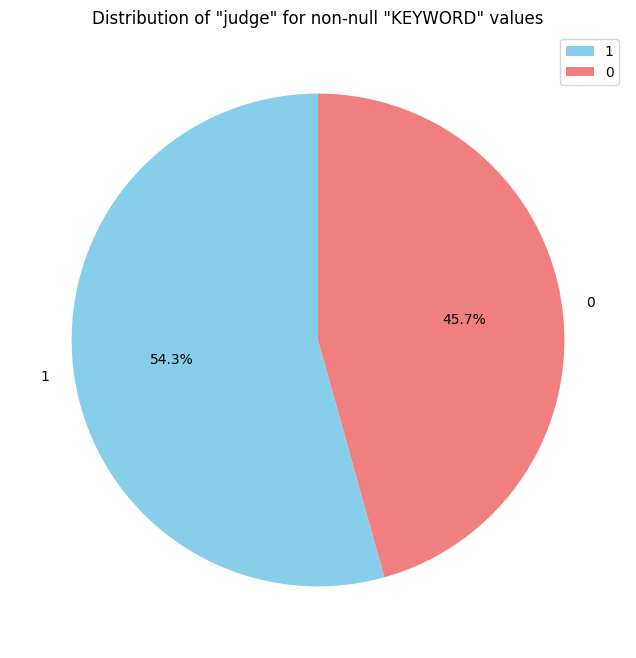

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 코드에서 얻은 값
value_counts = keyword_in_desc_df[keyword_in_desc_df['KEYWORD'].notna()]['judge'].value_counts()

# 원 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of "judge" for non-null "KEYWORD" values')
plt.legend()
plt.show()

In [29]:
in_keyword = len(keyword_in_desc_df[keyword_in_desc_df['KEYWORD'].isna()==False]['judge'])
judge_0_keyword= len(keyword_in_desc_df[(keyword_in_desc_df['KEYWORD'].isna()==False) & (keyword_in_desc_df['judge']==0)])
judge_1_keyword= len(keyword_in_desc_df[(keyword_in_desc_df['KEYWORD'].isna()==False) & (keyword_in_desc_df['judge']==1)])

print('이상상품:', round(judge_0_keyword / in_keyword,2))
print('정상상품:', round(judge_1_keyword / in_keyword,2))



이상상품: 0.46
정상상품: 0.54


# 상품명 안에 소문자, 특수문자 제거

In [31]:
products['CATALOG_NM'] = products['CATALOG_NM'].str.lower()
products['CATALOG_NM'] = products['CATALOG_NM'].apply(remove_punctuation)

# 상품명 안에 키워드

In [32]:
keyword_in_nm_df = pd.DataFrame({'CATALOG_NM':products['CATALOG_NM'],
                           'KEYWORD':products['CATALOG_NM'].apply(keywords_in_products),
                           'judge': products['judge']})

In [34]:
keyword_in_nm_df.head()

,CATALOG_NM,KEYWORD,judge
0,1boc44bromophenylaminopiperidinecas 443998650,[piperidine],0
1,high purity n tertbutoxycarbonyl 4piperidone c...,None,0
2,11dimethylethyl ester cas 288573568,None,0
3,white crystal nisopropylbenzylamine cas 102976...,None,0
4,soybean gmo nongmo,None,0


In [35]:
keyword_in_nm_df[keyword_in_nm_df['KEYWORD'].notna()].shape

(54999, 3)

In [37]:
keyword_in_nm_df[keyword_in_nm_df['KEYWORD'].notna()]['judge'].value_counts()

judge
0    33424
1    21575
Name: count, dtype: int64

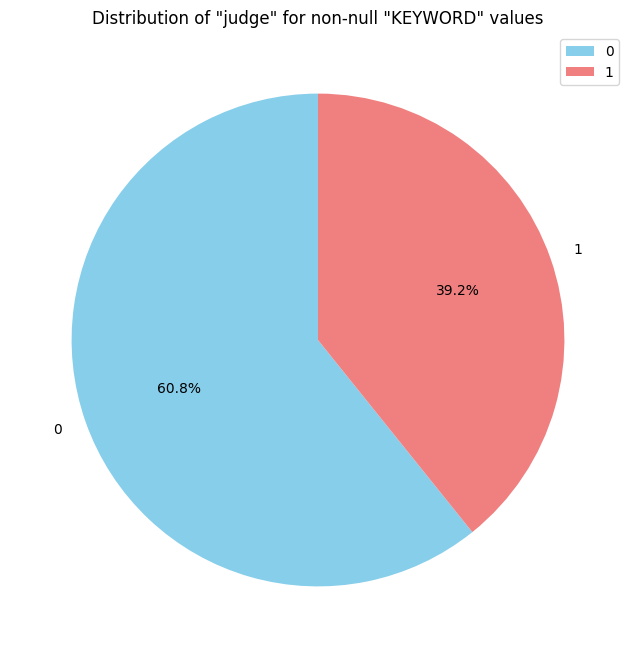

In [39]:
# 주어진 코드에서 얻은 값
value_counts = keyword_in_nm_df[keyword_in_nm_df['KEYWORD'].notna()]['judge'].value_counts()

# 원 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.legend()
plt.title('Distribution of "judge" for non-null "KEYWORD" values')
plt.show()

In [41]:
in_keyword = len(keyword_in_nm_df[keyword_in_nm_df['KEYWORD'].notna()]['judge'])
judge_0_keyword= len(keyword_in_nm_df[(keyword_in_nm_df['KEYWORD'].notna()) & (keyword_in_nm_df['judge']==0)])
judge_1_keyword= len(keyword_in_nm_df[(keyword_in_nm_df['KEYWORD'].notna()) & (keyword_in_nm_df['judge']==1)])

print('이상상품:', round(judge_0_keyword / in_keyword,2))
print('정상상품:', round(judge_1_keyword / in_keyword,2))

이상상품: 0.61
정상상품: 0.39


# 인콰이어리 데이터

In [42]:
inquiry = pd.read_csv('./dataset/인콰이어리데이터.csv')

In [43]:
inquiry.shape

(460000, 21)

In [63]:
inquiry['MESSAGE']

0         Dear Davis Brooks ,<br/><br/>Uchida Huynh from...
1         Dear Azhar Ayub,<br/><br/>Uchida Huynh from Ja...
2         Dear Kevin Hill,<br/><br/>Uchida Huynh from Ja...
3         Dear Toby ,<br/><br/>Uchida Huynh from Japan h...
4         Dear Alex Empedrad,<br/><br/>Uchida Huynh from...
                                ...                        
459995    We are importers of petroleum products, we int...
459996        HELLO    We are willing and ready to purch...
459997    Hello,    I have interest in your 7 Inch Andro...
459998    We are GREENWORLD IMPORT EXPORT CO., LTD, once...
459999    Dear Sir/Madam,    we, PRED OOO TMT are DIRECT...
Name: MESSAGE, Length: 460000, dtype: object

In [47]:
inquiry['MESSAGE'] = inquiry['MESSAGE'].str.replace('\r','').str.replace('\\','').str.replace('\n','')

In [48]:
inquiry['MESSAGE']

0         Dear Davis Brooks ,<br/><br/>Uchida Huynh from...
1         Dear Azhar Ayub,<br/><br/>Uchida Huynh from Ja...
2         Dear Kevin Hill,<br/><br/>Uchida Huynh from Ja...
3         Dear Toby ,<br/><br/>Uchida Huynh from Japan h...
4         Dear Alex Empedrad,<br/><br/>Uchida Huynh from...
                                ...                        
459995    We are importers of petroleum products, we int...
459996        HELLO    We are willing and ready to purch...
459997    Hello,    I have interest in your 7 Inch Andro...
459998    We are GREENWORLD IMPORT EXPORT CO., LTD, once...
459999    Dear Sir/Madam,    we, PRED OOO TMT are DIRECT...
Name: MESSAGE, Length: 460000, dtype: object

In [64]:
# <부터 '까지의 패턴 정의
pattern = r'<br/>*'

# 정규표현식을 사용하여 지우고 싶은 부분 삭제
inquiry['MESSAGE'] = inquiry['MESSAGE'].apply(lambda x: re.sub(pattern,'', x))

In [7]:

inquiry['MESSAGE']

NameError: name 'inquiry' is not defined